# Sesión 9
## Estadistica Aplicada 
**Jose Alfonso Gonzalez Acosta**
- 2 de marzo

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
from lifelines import KaplanMeierFitter

In [59]:
dic_t = {'tiempo':[12,19,20,20,33],
        'evento':[1,1,1,0,0]}

In [60]:
dic_n = {'tiempo':[3,5,7,9,18],
         'evento':[1,1,1,0,1]}

In [61]:
trat = pd.DataFrame(dic_t)
trat

,tiempo,evento
0,12,1
1,19,1
2,20,1
3,20,0
4,33,0


In [62]:
no_trat = pd.DataFrame(dic_n)
no_trat

,tiempo,evento
0,3,1
1,5,1
2,7,1
3,9,0
4,18,1


In [75]:
km_t = KaplanMeierFitter().fit(trat['tiempo'],trat['evento'])
km_nt = KaplanMeierFitter().fit(no_trat['tiempo'],no_trat['evento'])

In [76]:
km_t.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,5,5
12.0,1,1,0,0,5
19.0,1,1,0,0,4
20.0,2,1,1,0,3
33.0,1,0,1,0,1


In [77]:
km_nt.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,5,5
3.0,1,1,0,0,5
5.0,1,1,0,0,4
7.0,1,1,0,0,3
9.0,1,0,1,0,2
18.0,1,1,0,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

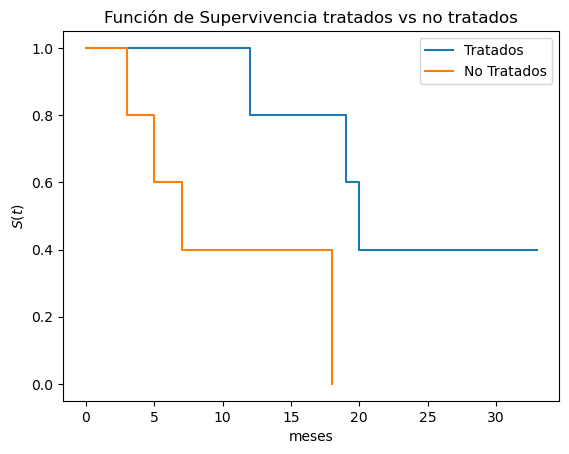

In [78]:
km_t.plot_survival_function(label = "Tratados", ci_show=False)
km_nt.plot_survival_function(label = "No Tratados", ci_show=False)
plt.title('Función de Supervivencia tratados vs no tratados')
plt.ylabel('$S(t)$')
plt.xlabel('meses')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

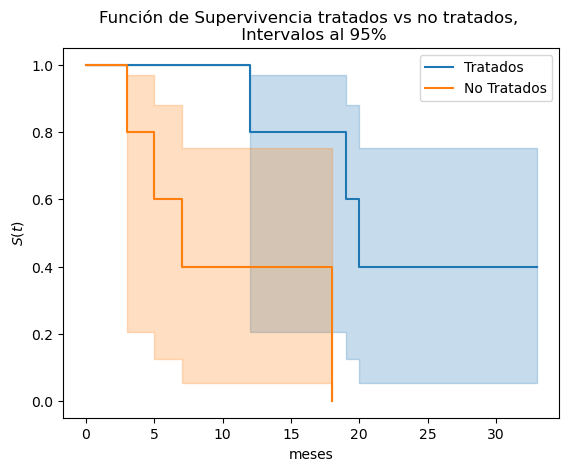

In [79]:
km_t.plot_survival_function(label = "Tratados")
km_nt.plot_survival_function(label = "No Tratados")
plt.title('Función de Supervivencia tratados vs no tratados, \n Intervalos al 95%')
plt.ylabel('$S(t)$')
plt.xlabel('meses')
plt.show

In [80]:
from lifelines.statistics import logrank_test

In [81]:
lrt = logrank_test(trat['tiempo'],trat['evento'],
                   no_trat['tiempo'],no_trat['evento'])
lrt

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.50 0.01      7.34

p-value< $\alpha$ Rechazamos H0.

Conclusion: a un 95% de confianza rechazamos H0, significativamente las funciones de supervivencia de tratados y no tratados son distintas.

In [82]:
km_nt.median_survival_time_

7.0

El 50% de los no tratados murió antes de los 7 meses.

In [83]:
km_t.median_survival_time_

20.0

El 50% de los tratados sobrevive mas de 20 meses.

In [84]:
from lifelines import ExponentialFitter

In [86]:
exp_t = ExponentialFitter().fit(trat['tiempo'],trat['evento'])

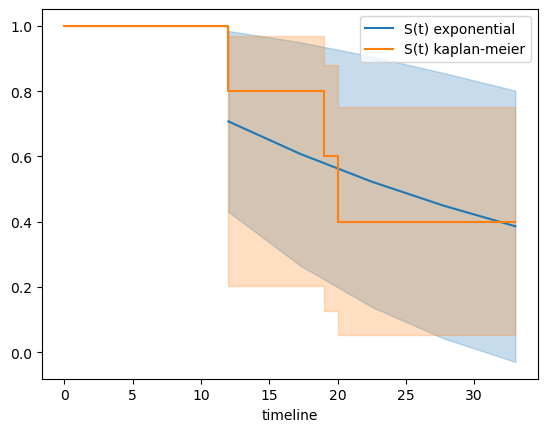

In [88]:
exp_t.plot_survival_function(label='S(t) exponential')
km_t.plot_survival_function(label='S(t) kaplan-meier')
plt.show()